This notebook takes the masks (bounding box labels) and changes them to the YOLO compatible format.

Before running the notebook, copy all image files (without renaming any of them) to a subdirectory allImages.
Then, copy all label text files to a subdirectory allMasks.

These 2 subdirectories must be under the directory:
'My\ Drive/LogoDetection'

The script will also rename the files in the allMasks sub directory to have them match with the names of the corresponding files in the allImages sub directory.

Please run all the cells in order

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/LogoDetection/
#go to appropriate directory in drive - Here, LogoDetection/allMasks contains the unprocessed text files of the bounding boxes.
#They have been copied into one folder (allMasks) without changing their names to maintain alphabetical ordering...
#This notebook will rewrite them with the correct parameters and rename them appropriately...

[Errno 2] No such file or directory: 'drive/My Drive/LogoDetection/'
/


In [0]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
#Rename all the image files to lower case so as to maintain alphabetical ordering...

%cd /
%cd content/drive/My\ Drive/LogoDetection/allImages

cnt = 0
for fil in sorted(os.listdir()):

  if fil.endswith('.jpg'):
    name = fil.lower()
    os.rename(fil, name)
    cnt += 1

print(cnt)
assert (cnt == 700)

/
/content/drive/My Drive/LogoDetection/allImages
700


In [0]:
#Capture the sizes of all the images...

%cd /
%cd content/drive/My\ Drive/LogoDetection/allImages

imageSizes = np.zeros((700,2))
cnt = 0

for fil in sorted(os.listdir()):
  
  assert fil.endswith('.jpg')

  img = cv2.imread(fil)
  # shape = img.shape[0]
  imageSizes[cnt] = float(img.shape[0]), float(img.shape[1]) # height -0 , widht - 1
  cnt += 1

  if cnt % 70 == 0:
    print(cnt)

/
/content/drive/My Drive/LogoDetection/allImages


In [0]:
#Rename all the mask files to lower case so as to maintain alphabetical ordering...
%cd /
%cd content/drive/My\ Drive/LogoDetection/allMasks

cnt = 0
for fil in sorted(os.listdir()):

  if fil.endswith('.jpg.bboxes.txt'):
    name = fil.lower()
    os.rename(fil, name)
    cnt += 1

print(cnt)
assert (cnt == 700)

/
/content/drive/My Drive/LogoDetection/allMasks
700


In [0]:
#This cell will retrieve the bounding box labels, change them to the correct format and store them in a .txt file which matches
# the name of the image file in allImages directory. It will then remove(delete) the old mask (.txt) files from this directory...

%cd /
%cd content/drive/My\ Drive/LogoDetection/allMasks

cnt = 0

# labels = np.zeros((700, 5), dtype = 'float32')/

temp = sorted(os.listdir())

for fil in sorted(temp):

    assert fil.endswith('.jpg.bboxes.txt')

    f = open(fil, "r")
    boxes = f.readlines()

    name = str(fil.split('.')[0]) + '.txt'

    f1 = open(name, "w")
  
    for box in boxes:

        param = box.split()

        w1 = float(param[0])
        h1 = float(param[1])
        w2 = float(param[2]) + w1
        h2 = float(param[3]) + h1

        h = imageSizes[cnt][0]
        w = imageSizes[cnt][1]

        x_center = float((w1 + w2) / 2)
        x_center = float(x_center / w)

        y_center = float((h1 + h2) / 2)
        y_center = float(y_center / h)

        width = float((w2 - w1) / w)
        height = float((h2 - h1) / h)

        # labels[cnt] = int((cnt // 70)), x_center, y_center, width, height

        l = int(cnt//70)

        # labels = str(str(a) + " " + str(b) + " " + str(c) + " " + str(d))
        labels = str(str(l) + " " + str(x_center) + " " + str(y_center) + " " + str(width) + " " + str(height))

        f1.write(str(labels + "\n"))

    f1.close()
    f.close()

    os.remove(fil)

    cnt += 1

    if cnt % 70 == 0:
        print(cnt)
  
  

print(cnt)
assert (cnt == 700)

/
/content/drive/My Drive/LogoDetection/allMasks
70
140
210
280
350
420
490
560
630
700
700


This below cell is experimental to see how data can be read and written to a file...**bold text**

In [0]:
# f = open('temp.txt', "r")
# f1 = open('temp1.txt', "w")

# boxes = f.readlines()


# for box in boxes:
  
#   b1 = box.split()
  
#   a = int(b1[0])
#   b = int(b1[1])
#   c = int(b1[2])
#   d = int(b1[3])

#   labels = str(str(a) + " " + str(b) + " " + str(c) + " " + str(d))
#   print(labels)
#   f1.write(str(labels + "\n"))

# f.close()
# f1.close()

# # print(l)

1 4 5 7
4 5 6 7
2 6 3 0
4 5 6 1


To check whether the images and masks have been correctly created, run the following cell.
The original image along with the cropped logo should be displayed...

/
/content/drive/My Drive/LogoDetection
509 230


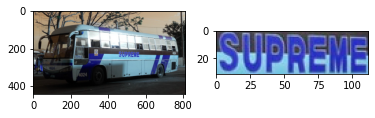

In [5]:
%cd /
%cd content/drive/My\ Drive/LogoDetection/

img = cv2.imread('allImages/supreme63.jpg')

f = open('allMasks/supreme63.txt', "r")

box = f.read().split()

h = img.shape[0]
w = img.shape[1]


x_center = int(float(box[1]) * w)
y_center = int(float(box[2]) * h)
width = int(float(box[3]) * w)
height = int(float(box[4]) * h)

print(x_center, y_center)

fig, axis = plt.subplots(1, 2)

axis[0].imshow(img)
axis[1].imshow(img[ y_center - height//2 : y_center + height//2, x_center - width//2 : x_center + width//2, :])

f.close()